In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg
from numpy import random
from sklearn import neighbors
import sklearn
import sklearn.datasets
import scipy.io
import math
import sys
sys.path.append("./modules")

# patch files
import vhdb as vhdb
import utils
import matplotlib.pyplot as plt

from functools import partial

import scipy.stats as st
import statsmodels.stats.multitest as mt
import statsmodels.api as sm


%load_ext autoreload
%autoreload 2


## Patches

In [2]:
# Generator
FL_ALL = vhdb.get_flist()

# Return patches from the VH database. - truncation
def patches(D,N,FL=[],RVAR = 0.2, RKNN = 0.3, K=15):
    P,I = vhdb.gen_all_patches(N, FL, RKNN, RVAR, K)
    return P[:,:D], I


In [3]:
N = 10000
D = 8
P,I = patches(D,N, FL=[], RKNN=0.3, RVAR = 0.2, K=15)

[10000, 0.2, 0.3, 1]
1654076
166667
(33334, 8)
kdt
(33334, 8)
(10000, 8)


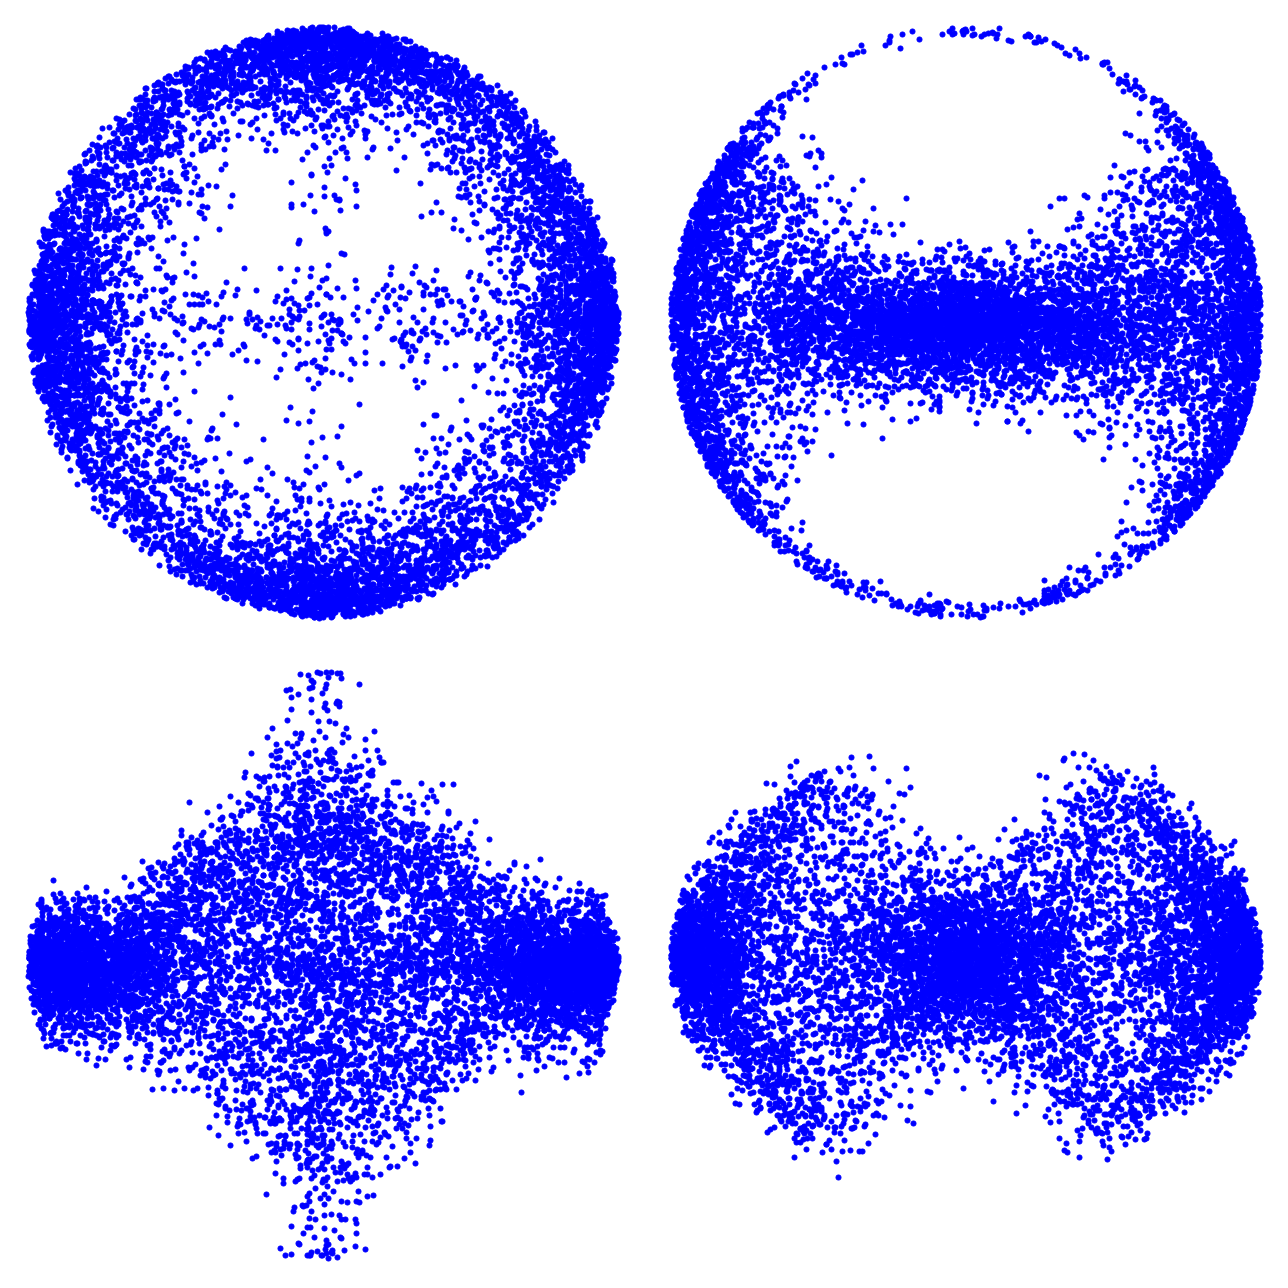

In [4]:
S = 25
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.scatter(P[:,0],P[:,1], s=S, c='blue')
plt.axis('equal')
plt.axis('off')

plt.subplot(2,2,2)
plt.scatter(P[:,0],P[:,2], s=S, c='blue')
plt.axis('equal')
plt.axis('off')

plt.subplot(2,2,3)
plt.scatter(P[:,0],P[:,3], s=S, c='blue')
plt.axis('equal')
plt.axis('off')

plt.subplot(2,2,4)
plt.scatter(P[:,0],P[:,4], s=S, c='blue')
plt.axis('equal')
plt.axis('off')


plt.tight_layout()
plt.savefig('patches_sample', dpi=300)


# Neptune 
    

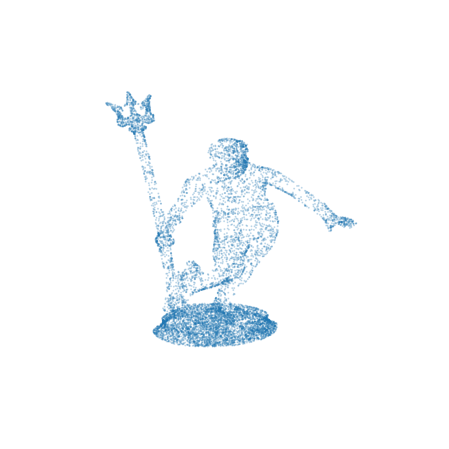

In [5]:
# read in file 
P,_,_ = np.load('./point_files/neptune.npy',allow_pickle=True)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_zticklabels('')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# take a random subsample of 10000 points
idx = np.random.choice(2000000,10000)

# main plotting
ax.scatter(P[idx,0],P[idx,1],P[idx,2], s=1,alpha=0.2)
ax.view_init(100, -93)
ax.axis('off') 
plt.savefig('neptune10k.png', dpi=300,bbox_inches = "tight",pad_inches=0.1)


# Hennenberg surface

In [6]:
# generate points

N = 10000
D = 3
r = np.random.uniform(0.4,0.6,N)
v = np.random.uniform(-np.pi,np.pi,N)
P = np.zeros([N,D])
P[:,0] = 2*np.cos(v)*(r**2-1)/r-(2/3)*np.cos(3*v)*(r**6-1)/(r**3)
P[:,1] = 2*np.sin(v)*(r**2)*(r**2-1)/(r**3)+(2/3)*np.sin(3*v)*(r**6-1)/(r**3)
P[:,2] = 2*np.cos(2*v)*(r**4+1)/(r**2)

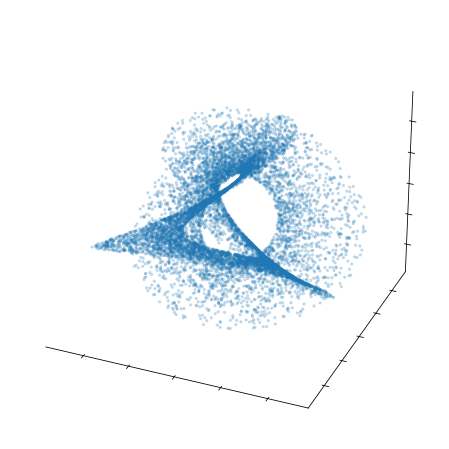

In [7]:
# plot 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.scatter(P[:,0],P[:,1],P[:,2],s=5,alpha=0.2)
ax.view_init(29, -67)

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])
plt.savefig('hennenberg.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

# Lorenz system

In [8]:
# generate points

def lorenz(N):
    # D is fixed at 3
    s=45
    r=54
    b=10
    dt = 0.01
    P = np.zeros([N,3])
    P[0,0]=np.random.random(1)
    P[0,1]=np.random.random(1)
    P[0,2]=np.random.random(1)

    for i in range(1,N):
        x_dot = s*(P[i-1,1] - P[i-1,0])
        y_dot = r*P[i-1,0] - P[i-1,1] - P[i-1,0]*P[i-1,2]
        z_dot = P[i-1,0]*P[i-1,1] - b*P[i-1,2]
        P[i,0]=P[i-1,0]+ (x_dot * dt)
        P[i,1]=P[i-1,1]+ (y_dot * dt)
        P[i,2]=P[i-1,2]+ (z_dot * dt)
            
    return P


<Figure size 576x432 with 0 Axes>

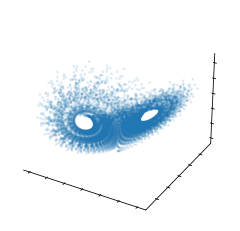

In [9]:
# plotting
# -------------------------------
# Note as this is regenerated from a random seed
# 
plt.figure(figsize=(8,6))

P = lorenz(10000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.scatter(P[:,0],P[:,1],P[:,2],s=3,alpha=0.1)

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])

plt.savefig('lorenz.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

# Brownian motion

In [10]:
# generate points
def bm(D,N,SIG):
    Z = SIG*np.random.randn(N,D)
    P = np.cumsum(Z,axis=0)
    return P,3


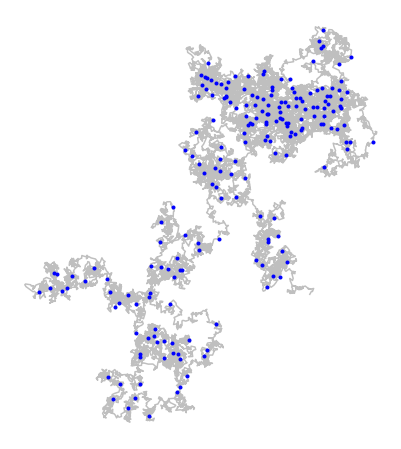

In [11]:
P,_ = bm(2,20000,1)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(P[:,0],P[:,1],'gray',alpha=0.5)
ax.plot(P[::100,0],P[::100,1],'b.')
ax.set_aspect('equal')
ax.axis('off')
plt.savefig('bm.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

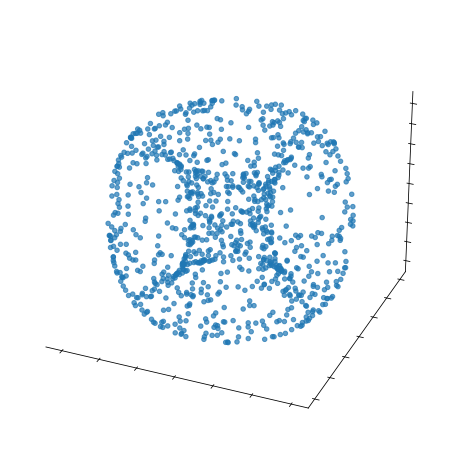

In [12]:
# plot 
def torus(N,R1,R2):
    a = np.random.uniform(0,2*np.pi,size=(N,2))
    P = np.zeros((N,3))
    P[:,0] = (R1+R2*np.cos(a[:,0]))*np.cos(a[:,1])
    P[:,1] = (R1+R2*np.cos(a[:,0]))*np.sin(a[:,1])
    P[:,2] = (R2*np.sin(a[:,0]))
    return P
P = torus(1000,2,1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.scatter(P[:,0],P[:,1],P[:,2],s=20,alpha=0.7)
ax.view_init(29, -67)

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])
plt.savefig('torus3.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

In [13]:
def sampleLinkage(N,seed):
        rng = np.random.seed(seed)

        # choose two angles
        a = np.random.uniform(0,2*np.pi,size=(100*N,2))
        x0 = np.cos(a[:,0])
        x1 = 1+np.cos(a[:,1])
        y0 = np.sin(a[:,0])
        y1 = np.sin(a[:,1])

        d = (x0-x1)**2 + (y0-y1)**2
        while np.sum(d<4)<N:
                a = np.random.uniform(0,2*np.pi,size=(10*N,2))
                x0 = np.cos(a[:,0])
                x1 = 1+np.cos(a[:,1])
                y0 = np.sin(a[:,0])
                y1 = np.sin(a[:,1])
                d = (x0-x1)**2 + (y0-y1)**2
        
        indx = np.where(d<4)[0]
        P = np.zeros((N,6))
        x0 = x0[indx[:N]]
        P[:,0] = x0
        x1 = x1[indx[:N]]
        P[:,2] = x1
        y0 = y0[indx[:N]]
        P[:,1] = y0
        y1 = y1[indx[:N]]
        P[:,3] = y1
        
        midpointx = (x1-x0)/2
        midpointy = (y1-y0)/2

        c = np.random.uniform(-1,1,size=N)
        c[c>0]=1
        c[c<=0]=-1
        vx = -c*midpointy
        vy = c*midpointx

        n = np.sqrt(vx**2+vy**2)
        n1 = np.sqrt(1-n**2) 
        P[:,4] = midpointx+x0+n1*(vx/n) 
        P[:,5] = midpointy+y0+n1*(vy/n) 
        
        
        vx = c*midpointy
        vy = -c*midpointx

        n = np.sqrt(vx**2+vy**2)
        n1 = np.sqrt(1-n**2) 
        a = midpointx+x0+n1*(vx/n) 
        b = midpointy+y0+n1*(vy/n) 
        return P,a,b
    


In [14]:
P.shape

(1000, 3)

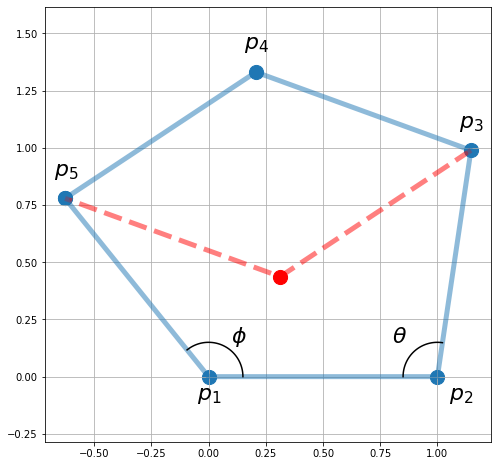

In [15]:
plt.figure(figsize=(8,8))
i=0
N=1
P,a,b = sampleLinkage(N,18783)
for i in range(N):
    plt.plot([P[i,2],a[i], P[i,0]],[P[i,3],b[i], P[i,1]],'--',c='r',lw=5,alpha=0.5)
    plt.plot([P[i,0],0,1,P[i,2],P[i,4], P[i,0]],[P[i,1],0,0,P[i,3],P[i,5], P[i,1]],lw=5,alpha=0.5)
    plt.scatter([P[i,0],0,1,P[i,2],P[i,4], P[i,0]],[P[i,1],0,0,P[i,3],P[i,5], P[i,1]],s=200)
    plt.scatter(a[i],b[i],s=200,c='r')
    

    plt.text(P[i,0]-0.05, P[i,1]+0.1, '$p_5$', fontsize = 22)
    plt.text(P[i,2]-0.05, P[i,3]+0.1, '$p_3$', fontsize = 22)
    plt.text(P[i,4]-0.05, P[i,5]+0.1, '$p_4$', fontsize = 22)
    plt.text(-0.05, -0.1, '$p_1$', fontsize = 22)
    plt.text(1.05, -0.1, '$p_2$', fontsize = 22)
    plt.text(0.1, 0.15, r'$\phi$', fontsize = 22)
    plt.text(0.8, 0.15, r'$\theta$', fontsize = 22)
    
    f = np.linspace(0,np.arctan2(P[i,1],P[i,0]),100)
    plt.plot(0.15*np.cos(f),0.15*np.sin(f),'k')
    f = np.linspace(np.arctan2(P[i,3],P[i,2]-1),np.pi,100)
    plt.plot(1+0.15*np.cos(f),0.15*np.sin(f),'k')
    

plt.grid()
plt.axis('equal')


plt.savefig('linkage.pdf', dpi=300,bbox_inches = "tight",pad_inches=0.1)

st

In [16]:
angle(np.arctan(P[i,3]/P[i,2])

SyntaxError: unexpected EOF while parsing (2810754776.py, line 1)